## Observations and Insights 

Four of the 10 drug treatments showedresults that merited further studt. Aproximately equal number of male and female mice were used in the study. The length of time the test mouse received the drug treatment resulted in more shrinkage of the tumor. Capomulin showed to have most consistent results.    

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results,mouse_metadata,how="left",on = "Mouse ID")


# Display the data table for preview

mouse_metadata.head()
study_results.head()
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice.
mouse_count = len(mouse_study_merge["Mouse ID"].unique())
print(mouse_count)

249


In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
query = mouse_study_merge.duplicated(subset=["Mouse ID", "Timepoint"])
dup_mouse_id = mouse_study_merge.loc[query,"Mouse ID"].unique()
print(dup_mouse_id )


['g989']


In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
query = mouse_study_merge["Mouse ID"] == "g989"
dup_records = mouse_study_merge[query]
print(dup_records)
                                


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
query = mouse_study_merge["Mouse ID"].isin(dup_mouse_id) == False  
clean_mouse_dataframe = mouse_study_merge[query]

clean_mouse_dataframe.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_dataframe["Mouse ID"].unique())

clean_mouse_count

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_group = clean_mouse_dataframe.groupby("Drug Regimen")
mean_TV = drug_regimen_group.mean()['Tumor Volume (mm3)']
median_TV = drug_regimen_group.median()['Tumor Volume (mm3)']
variance_TV = drug_regimen_group.var()['Tumor Volume (mm3)']
std_dev_TV = drug_regimen_group.std()['Tumor Volume (mm3)']
sem_TV = drug_regimen_group.sem()['Tumor Volume (mm3)']

summary_data = {"Mean Tumor Volume":mean_TV, "Medain Tumor Volume":median_TV, 
                 "Tumor Volume Variance":variance_TV,"Standard Deviation":std_dev_TV, 
                 "SEM":sem_TV}

summary_dataframe = pd.DataFrame(summary_data)

summary_dataframe




,Mean Tumor Volume,Medain Tumor Volume,Tumor Volume Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_dataframe2 = clean_mouse_dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_dataframe2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

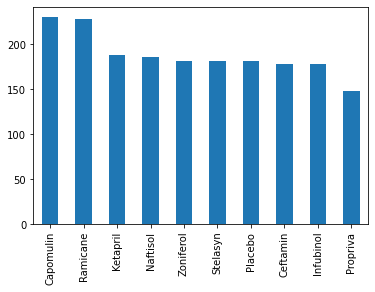

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts_per_drug = clean_mouse_dataframe["Drug Regimen"].value_counts()
counts_per_drug.plot(kind="bar")

In [47]:
counts_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

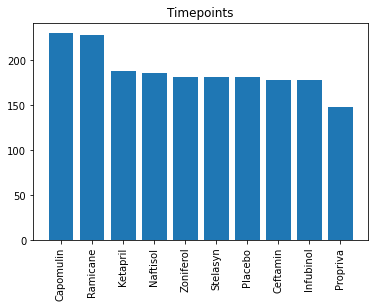

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
labels = counts_per_drug.index
values = counts_per_drug
plt.bar(labels, values)
plt .title('Timepoints')
plt.xticks(rotation=90)
plt.show()


In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_per_Sex = clean_mouse_dataframe["Sex"].value_counts()
counts_per_Sex



Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

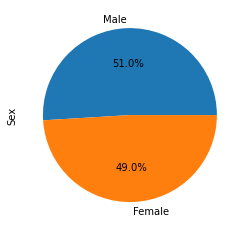

In [50]:
counts_per_Sex.plot(kind="pie",autopct = "%1.1F%%")

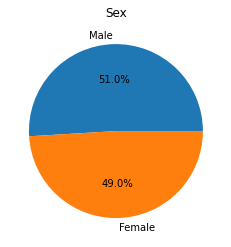

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(counts_per_Sex,autopct ="%1.1F%%",labels=counts_per_Sex.index)
plt .title('Sex')
plt.show()



## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#query = clean_mouse_dataframe["Drug Regimen"].isin(lst_treatments)
#df_drug_regimen = clean_mouse_dataframe[query]
#df_max_group = df_drug_regimen.groupby(["Mouse ID"]).max()
#df_max_group
 

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = clean_mouse_dataframe.groupby(["Mouse ID"])["Timepoint"].max()
tumor_max = tumor_max.reset_index()

tumor_max



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = tumor_max.merge(clean_mouse_dataframe, on = ["Mouse ID", "Timepoint"], how = "left")



In [53]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
lst_Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

lst_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


for treatment in lst_treatments:
    query = merge_df["Drug Regimen"] == treatment
    final_tumor = merge_df[query]["Tumor Volume (mm3)"]
    
    #save result of query into list with append
    lst_Tumor_vol_data.append(final_tumor)
    quartile = final_tumor.quantile([.25,.5,.75]) 
    lowr_quartile = quartile[0.25]
    upper_quartile = quartile[0.75]
    IQR = upper_quartile-lowr_quartile
    lwr_boundary = lowr_quartile - (1.5*IQR)
    upper_boundary = upper_quartile + (1.5*IQR)
    query_outlier = (final_tumor < lwr_boundary) | (final_tumor > upper_boundary)
    outlier = final_tumor[query_outlier]
    print(f"{treatment} Potential outliers are {outlier}")
    
    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin Potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


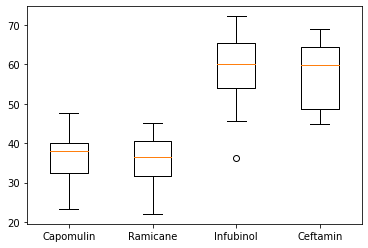

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.boxplot(lst_Tumor_vol_data)
ax.set_xticklabels(lst_treatments)
plt.show()

## Line and Scatter Plots

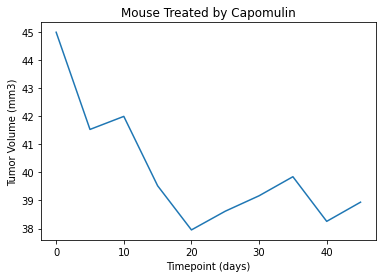

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
query = clean_mouse_dataframe["Drug Regimen"] == "Capomulin"
capomu_df = clean_mouse_dataframe[query]
capomu_df
query_b742 = capomu_df["Mouse ID"] == "b742"
b742_df = capomu_df[query_b742]
b742_df
x = b742_df["Timepoint"]
y = b742_df["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Treated by Capomulin")
plt.show()
          

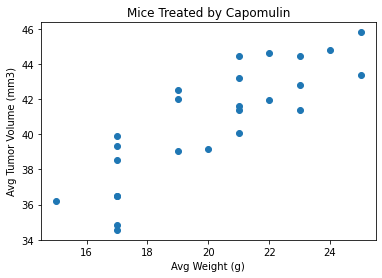

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg = capomu_df.groupby(["Mouse ID"]).mean()
x = capomulin_avg["Weight (g)"]
y = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.xlabel("Avg Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mice Treated by Capomulin")
plt.show()


## Correlation and Regression

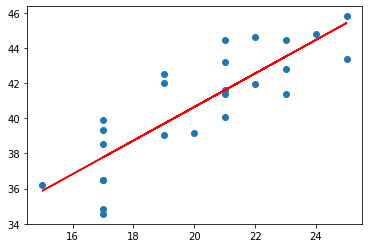

'There is a positive correlation between the weight of the mouse and the average tumor volume'

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)[0]

model = st.linregress(x,y)
y_model = x * model[0] + model[1]

plt.scatter(x,y)
plt.plot(x,y_model,color = "red")
plt.show()

f"There is a positive correlation between the weight of the mouse and the average tumor volume"
